# Predicting Precipitation from towns in Western Massachusetts using Multivariate Regression
Jonathan Clifford, Griffin Manns, Isaiah Provencher

In [1]:
# A few notes before we begin to code:
# 1) All weather data is sourced from NOAA sites in Massachusetts. 
# 2) Due to the way that the data is formatted, we had to truncate to a list of five towns. These cover a fairly broad area
# in western massachusetts, and feel as though it is good to have a starting model based off this. 
# 3) Weather was collected from January 1st 2015 - December 31st 2020

# import dependies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The labels of the data are as follows: 
# STATION|NAME (of town)|LATITUDE|LONGITUDE|ELEVATION|DATE|AWND|PRCP(precipitation, what we are predicting)|SNOW|TAVG|TMAX|TMIN|TOBS|WESF|WT01|...|WT11

# ultimately our algorithm will be predicting the Precipitation of this. 
data = pd.read_csv('NewDataMLEdited.csv', sep=',',header=None).values

stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
# for some reason, the special weather conditions aren't linear WT01...WT11, but whatever.
print("Data has been loaded.")

Data has been loaded.


# Visualization of the dataset

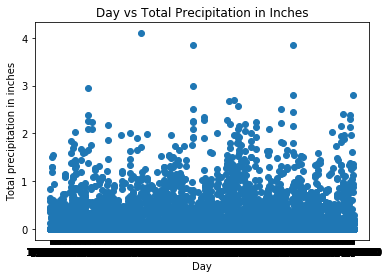

In [2]:
# Now, in order to visualize the data, we will create a simple scatterplot 
# showcasing the x axis as the date, and the y axis as the precipitation. 

plt.scatter(date, precipitation)
plt.xlabel("Day")
plt.ylabel("Total precipitation in inches")
plt.title("Day vs Total Precipitation in Inches")
plt.show()

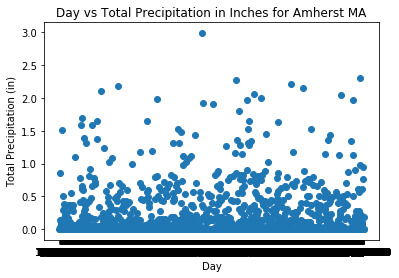

In [3]:
# similarly, I will do the same thing as above, but instead only for one town (Amherst)
curDate = []
curPrecip = []
for i in range(len(date)):
    if townName[i] == "AMHERST, MA US":
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
# print(curPrecip)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA")
plt.show()

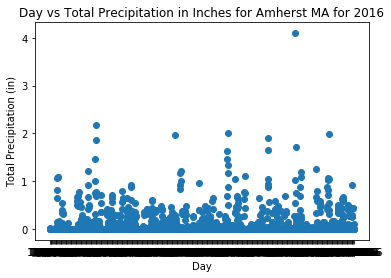

In [4]:
# similarly, we can do the same thing as above for Amherst, but only for the year of 2016. 
curDate = []
curPrecip = []
for i in range(len(date)):
    if "2016" in date[i]:
        curDate.append(date[i])
        curPrecip.append(precipitation[i])
        
# print(curDate)
plt.scatter(curDate, curPrecip)
plt.xlabel("Day")
plt.ylabel("Total Precipitation (in)")
plt.title("Day vs Total Precipitation in Inches for Amherst MA for 2016")
plt.show()

# Reloading A Modified Dataset & Grabbing What We Need

In [5]:
# Now we will begin the actual determination of the dataset. 
# We also need to essentially extract the predictor data from what we want to actually predict.
# in other words, we just need to take out the precipitation dataset from the table. 

# in addition, we will also be reloading the dataset here. 
# Why? Because we had to do quite a few modifcations to the NOAA dataset so multivariate regression works. 
# ex: towns needed to go from being named what they are to numbers, dates are days since jan 1st 1900, etc. 
# since we want as many predictors as possible in order to potentially have the most accurate dataset, 
# we'll have this here be modified, above will remain the same. 
data = pd.read_csv('NewDataMLEdited2.csv', sep=',',header=None).values
stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
print("Data has been loaded.")
dataToUse = np.delete(data,7,1) # make dataToUse to be everything in the data array, except the 7th row (precip)
# also... we're going to have to not use the data from the Tobs table. Why? Because its inconsistent... some times 
# NOAA kept track of the temp at the observed times, sometimes it didn't. 
dataToUse = np.delete(dataToUse, 12, 1)
# now that we've grabbed the data that we want, we can actually start running it through an algorithm
print("dataToUse has grabbed what it needs.")

Data has been loaded.
dataToUse has grabbed what it needs.


# Seperating Into Test & Training Datasets.

In [6]:
# ______________________________________________________________________________________________________________
# Creating the Multivariate Regression Algorithm to actually do what we want. 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# need to seperate the data into test and training segments. 
# going to seperate it into 80% train, 20% test
# this ends up being ~8677 train sets, ~2169 test
x_train, x_test, y_train, y_test = train_test_split(dataToUse, precipitation, test_size=0.1)
print(len(y_test)) # returns 2170, we're good! 


1085


# Creating & Quanitfying The Multivariate Regression Model

In [7]:
mv = LinearRegression(normalize = True, n_jobs = -1) # Technically we don't *really* need to normalize, but there are a few 
# datapoints outside of normalization, so it's better safe than sorry. 
mv.fit(x_train, y_train) # fit to the dataset. 

# now compare to what our test data gives us 
yPredTrain = mv.predict(x_train)
yPredTest = mv.predict(x_test)


#_________________________________________________________________________________

# check accuracy compared to the training data. 
trainMSE = (mean_squared_error(y_train, yPredTrain))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

# check accuracy of set compared to the test data
testMSE = (mean_squared_error(y_test, yPredTest))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)

The Mean Squared Error of the Training Model is: 
0.07889448143690883
The Mean Squared Error of the Test Model is: 
0.07784626766787804


In [9]:
#_________________________________________________________________________________
# Now, let's cross validate. 
from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept':[True, False],
              'normalize' : [True, False] ,
              'n_jobs':[1, 10, 100, 1000, 10000, -1]}
gridMV = GridSearchCV(estimator = mv, param_grid = parameters, cv = 10)
gridMV.fit(x_train, y_train)
yPredTrainN = gridMV.predict(x_train)
yPredTestN = gridMV.predict(x_test)


trainMSE = (mean_squared_error(y_train, yPredTrainN))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

testMSE = (mean_squared_error(y_test, yPredTestN))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)


The Mean Squared Error of the Training Model is: 
0.07889448143690883
The Mean Squared Error of the Test Model is: 
0.07784626766787804


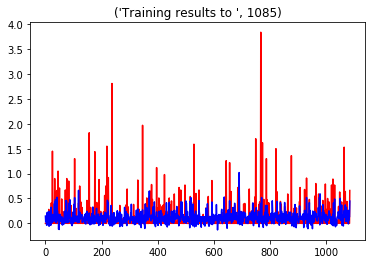

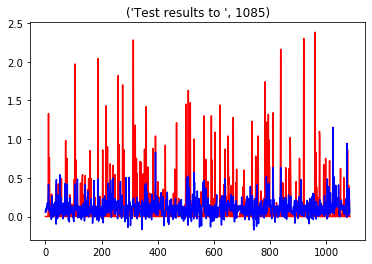

In [10]:
# Now, plot versus actual data. 
# For ease of use, I will only use the first 30 datapoints, specifically with the dates. 
pointToEnd = len(y_test)
plt.plot(y_train[0:pointToEnd], color = 'red')
plt.plot(yPredTrainN[0:pointToEnd], color = 'blue')
title = "Training results to ", pointToEnd
plt.title(title)
plt.show()
plt.plot(y_test[0:pointToEnd], color = "red")
plt.plot(yPredTestN[0:pointToEnd], color = "blue")
title = "Test results to ", pointToEnd
plt.title(title)
plt.show()




# Creating a Regression Decision Tree Classifier For Our Model

In [21]:
# making a decision regression tree & cross validating. 
from sklearn.tree import DecisionTreeRegressor

regTree = DecisionTreeRegressor()
parameters = {'max_depth':[3, 4, 5, 6, 7],
              'min_samples_split':[2, 3, 4],
              'min_samples_leaf':[2,3, 4],
              'max_leaf_nodes':[None, 1, 2, 3, 4, 5, 10],
              'min_weight_fraction_leaf':[0.0,0.000001, 0.001, 0.005, 0.01,0.05,0.1, 1],
              'ccp_alpha':[0.0,0.000001, 0.001,0.005,0.01,0.05, 0.1, 0.5]
             }
gridTree = GridSearchCV(estimator = regTree, param_grid = parameters, cv = 5, n_jobs = -1)
gridTree.fit(x_train, y_train)
predRegTreeTrain = gridTree.predict(x_train)
predRegTreeTest = gridTree.predict(x_test)

trainMSE = (mean_squared_error(y_train, predRegTreeTrain))
print("The Mean Squared Error of the Training Model is: ")
print(trainMSE)

testMSE = (mean_squared_error(y_test, predRegTreeTest))
print("The Mean Squared Error of the Test Model is: ")
print(testMSE)

The Mean Squared Error of the Training Model is: 
0.07762385129111052
The Mean Squared Error of the Test Model is: 
0.07691094001013879


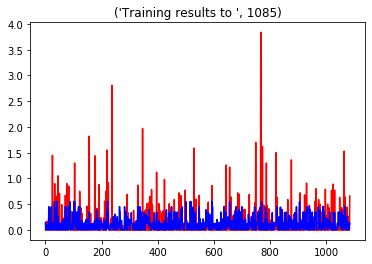

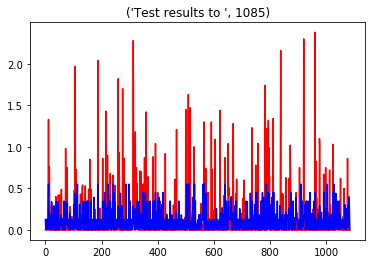

In [22]:
# Now, plot versus actual data. 
pointToEnd = len(y_test)
plt.plot(y_train[0:pointToEnd], color = 'red')
plt.plot(predRegTreeTrain[0:pointToEnd], color = 'blue')
title = "Training results to ", pointToEnd
plt.title(title)
plt.show()
plt.plot(y_test[0:pointToEnd], color = "red")
plt.plot(predRegTreeTest[0:pointToEnd], color = "blue")
title = "Test results to ", pointToEnd
plt.title(title)
plt.show()

# Creating a Logistic Regression Model For Binary Outcome of Whether there will be Precipitation Or Not

In [81]:
# Reloading the dataset here for Logistic Regression
# In order to predict whether it will rain or not rain for the predicted day

data = pd.read_csv('LogisticRegression.csv', sep=',',header=None).values
stations = data[:,0]
townName = data[:,1]
latitude = data[:,2]
longitude = data[:,3]
elevation = data[:,4]
date = data[:,5]
awnd = data[:,6]
precipitation = data[:,7]
snow = data[:,8]
snwd = data[:,9]
tempAvg = data[:,10]
tempMax = data[:,11]
tempMin = data[:,12]
tempObs = data[:,13]
wesf = data[:,14]
wt01 = data[:,15]
wt02 = data[:,16]
wt03 = data[:,17]
wt04 = data[:,18]
wt05 = data[:,19]
wt06 = data[:,20]
wt08 = data[:,21]
wt09 = data[:,22]
wt11 = data[:,23]
print("Data has been loaded.")
dataToUse = np.delete(data,7,1) # make dataToUse to be everything in the data array, except the 7th row (precip)
# also... we're going to have to not use the data from the Tobs table. Why? Because its inconsistent... some times 
# NOAA kept track of the temp at the observed times, sometimes it didn't. 
dataToUse = np.delete(dataToUse, 12, 1)
# now that we've grabbed the data that we want, we can actually start running it through an algorithm
print("dataToUse has grabbed what it needs.")

Data has been loaded.
dataToUse has grabbed what it needs.


In [82]:
#Lists for days it rained and did not rain 
zeros = []
ones = []
for i in range(len(date)):
    if precipitation[i] == 0:
        zeros.append(precipitation[i])
    elif precipitation[i] == 1:
        ones.append(precipitation[i])
        
print("Days with no Rain: ",len(zeros))
print("Days with Rain: ",len(ones))

Days with no Rain:  6825
Days with Rain:  4021


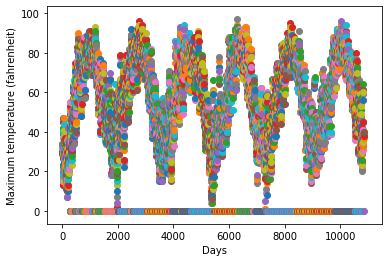

In [83]:
# Graph for maximum temperatures
for i in range(len(tempMax)):
    plt.scatter(i,tempMax[i])
plt.xlabel("Days")
plt.ylabel("Maximum temperature (fahrenheit)")
plt.show()

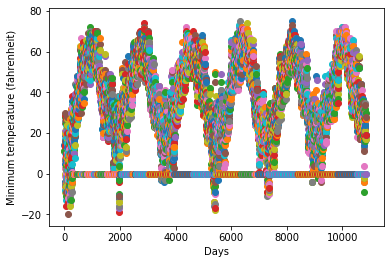

In [84]:
# Graph for minimum temperatures
for i in range(len(tempMin)):
    plt.scatter(i,tempMin[i])
plt.xlabel("Days")
plt.ylabel("Minimum temperature (fahrenheit)")
plt.show()

In [95]:
# Normalization of data function, used and edited the code given to us in class
y = precipitation

def normalize_features( X, mu=None, sigma=None ):
    if mu is None:
        mu    = np.mean(X, axis=0)
        sigma = np.std (X, axis=0)
    # Don't normalize constant features
    mu   [sigma == 0] = 0
    sigma[sigma == 0] = 1
    X_norm = (X - mu)/sigma
        
    return (X_norm, mu, sigma)

m = data.shape[0]
X = np.stack([np.ones(m), tempMax, tempMin], axis=1)
n = X.shape[1]

X, mu, sigma = normalize_features(X)

In [96]:
#Create functions needed for logistic regression

# Function for logistic function
def logistic(z):
    p = np.full(z.shape, 0.5)
    p = 1/ (1 + np.exp(-z))
    return p

# Function for the cost function
def cost_function(X, y, theta):
    thetaT = np.transpose(theta)
    exponent = np.dot(X, thetaT)
    
    h = 1/(1 + np.exp(-exponent))
    cost = np.dot(-y,np.log(h)) - np.dot((1-y), np.log(1-h))
    return cost

# function for gradient descent
def gradient_descent( X, y, theta, alpha, iters ):
    J_history = []
    for i in range(iters):
        thetaT = np.transpose(theta)
        exponent = np.dot(X,thetaT)
        
        h = 1 / (1 + np.exp(-exponent))
        Jd = 2 * np.dot((h- y), X)
        theta = theta - alpha*Jd
        
        J_history.append(cost_function(X,y,theta))
    return theta, J_history

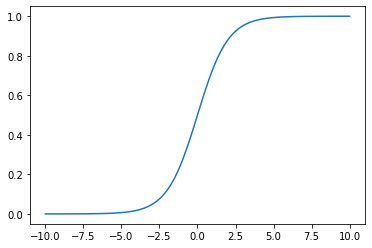

In [97]:
# implement logistic function, check if works
z = np.linspace(-10, 10, 100)
plt.plot(z, logistic(z))
plt.show()

In [98]:
#Implement Cost function
theta = np.zeros(n)
print(cost_function(X,y, theta)) # prints 38.81624....

7517.874320353163


In [99]:
#Setup plot for learned model, used and edited code from hw
def plot_model(X, y, theta):
    pos = y==1
    neg = y==0

    plt.scatter(X[pos,1], X[pos,2], marker='+', color='blue', label='Precipitation')
    plt.scatter(X[neg,1], X[neg,2], marker='o', color='red', facecolors='none', label='No Precipitation')

    # plot the decision boundary
    x1_min = np.min(X[:,1]) - 0.5
    x1_max = np.max(X[:,1]) + 0.5

    x1 = np.array([x1_min, x1_max])
    x2 = (theta[0] + theta[1]*x1)/(-theta[2])
    plt.plot(x1, x2, label='Decision boundary')

    plt.xlabel('Max Temp (normalized)')
    plt.ylabel('Min Temp (normalized)')
    plt.legend(loc='lower right')
    plt.show()

250


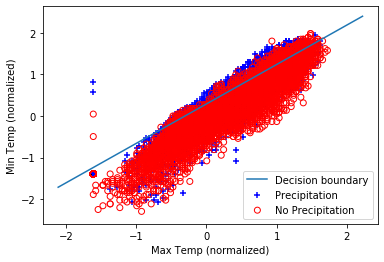

In [106]:
# Implement gradient descent for logiatic regression
theta = np.zeros(n)

#
# YOUR CODE HERE
#
alpha = 0.0002 #step size
iters = 250

theta2,J_history = gradient_descent( X, y, theta, alpha, iters ) #call gradient function
print(len(J_history)) # check length of J_history 

plot_model(X, y, theta2) 

In [107]:
print("Final value of cost function: ", cost_function(X,y,theta2))

Final value of cost function:  6746.2262736977955


Text(0.5, 1.0, 'Cost Function vs Iterations')

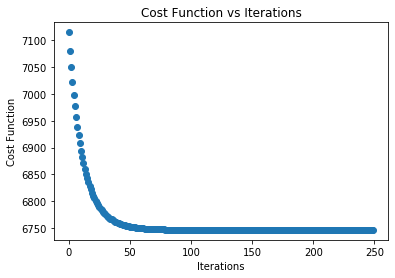

In [108]:
#Plot J_history to see convergence
i = 0
iList = [] # creates list of iterations
while i < iters: # counts until reaches amount of iterations
    iList.append(i) # adds each iteration to list 
    i = i+1
plt.scatter(iList, J_history) # plot
plt.ylabel("Cost Function")
plt.xlabel("Iterations")
plt.title("Cost Function vs Iterations")


In [109]:
#Print the accuracy -
theta2T = np.transpose(theta2) #transpose of theta2 
h = 1 / (1 + np.exp(-np.dot(X,theta2T))) # h(x)
accurate = 0 #intialize
i = 0 #intialize
while i < len(y): # run if within length of preciptation vector
    if y[i] == round(h[i]): # from  piazza
        accurate= accurate + 1
    i = i + 1
accurate = (1/len(y))*accurate
print("Accuracy: ",accurate)

Accuracy:  0.6705697953162456


Accuracy score using confusion matrix:  0.7497695852534563

Precision: Predicted
0.0    0.756402
1.0    0.731107
dtype: float64

Recall: Actual
0.0    0.887830
1.0    0.516129
dtype: float64


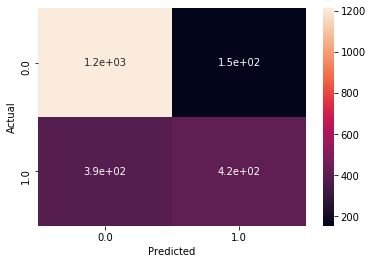

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

# Other ways to find the score
#splitting the data then using built in logistic regression tool
#X = dataToUse
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)
Lg2 = LogisticRegression(max_iter = 10000000000)
Lg2.fit(x_train2, y_train2)
y_predict = Lg2.predict(x_test2)
score = Lg2.score(x_test2, y_test2)

# Find accuracy using confusion matrix, which I found online how to make
confusion_m = pd.crosstab(y_test2,y_predict, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_m, annot=True)

#Print accuracy and precison and plot confusion matrix
print('Accuracy score using confusion matrix: ',metrics.accuracy_score(y_test2, y_predict))
tp_fn = confusion_m.sum(1)
tp_fp = confusion_m.sum(0)
tp = np.diagonal(confusion_m)
precision = tp/tp_fp
recall = tp/tp_fn
print("\nPrecision:",precision)
print("\nRecall:",recall)
plt.show()

In [191]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


#Split and run Logistic Regression using built in functions again 
# used list with data that is deleted
#X = dataToUse
x_train3, x_test3, y_train3, y_test3 = train_test_split(X, precipitation, test_size=0.2)
Lg = LogisticRegression(max_iter = 10000000000)


# Cross validate using Gridsearch to improve accuracy 
params = {'C': [ 0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500]}
LGGrid = GridSearchCV(Lg, params, cv = 5, n_jobs = -1)
LGGrid = LGGrid.fit(x_train3, y_train3)
y_predictTrain = LGGrid.predict(x_train3)
y_predictTest = LGGrid.predict(x_test3)
print("Accuracy scores for list of C: \n",LGGrid.cv_results_['mean_test_score'])
print("\nBest value of C: ",LGGrid.best_params_)
print("Best Accuracy score:", np.max(LGGrid.cv_results_['mean_test_score']))

Accuracy scores for list of C: 
 [0.67934687 0.68291883 0.69018254 0.6764635  0.71449641 0.72129749
 0.69813377 0.69444634 0.70400649 0.67923    0.70400649 0.69121848]

Best value of C:  {'C': 0.5}
Best Accuracy score: 0.721297493990624


# Neural Network for Binary Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow import keras

In [2]:
data = pd.read_csv("Data_with_Headers.csv")
data.drop('Date', axis = 1, inplace = True)
data.drop('Stations', axis = 1, inplace = True)
data.drop('townName', axis = 1, inplace = True)
data

,Latitude,Longitude,Elevation,awnd,Precipitation,Snow,snwd,TempAvg,TempMax,TempMin,...,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,42.426850,-73.289070,363.9,9.40,0,0.0,0.0,21.5,29,14,...,0.0,0,0,0,0,0,0,0,0,0
1,42.697280,-73.169670,195.1,6.49,0,0.0,0.0,21.5,32,11,...,0.0,0,0,0,0,0,0,0,0,0
2,42.386100,-72.537400,44.2,0.00,0,0.0,0.0,20.5,30,11,...,0.0,0,0,0,0,0,0,0,0,0
3,42.270600,-71.873100,304.8,14.99,0,0.0,0.0,20.0,30,13,...,0.0,0,0,0,0,0,0,0,0,0
4,42.426850,-73.289070,363.9,12.30,0,0.0,0.0,27.0,33,21,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,42.426850,-73.289070,363.9,10.29,1,0.0,0.0,32.0,37,27,...,0.0,1,0,0,0,0,1,0,0,0
10842,42.697280,-73.169670,195.1,11.18,1,0.0,0.0,35.0,40,30,...,0.0,1,0,0,0,0,0,0,0,0
10843,42.386100,-72.537400,44.2,0.00,1,0.0,0.0,28.5,38,19,...,0.0,0,0,0,0,0,0,0,0,0
10844,42.117921,-72.618386,17.4,0.00,1,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0,0,0,0,0,0


In [3]:
pd.set_option('display.max_columns', None)
data.isnull()

,Latitude,Longitude,Elevation,awnd,Precipitation,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10843,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10844,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
y = data['Precipitation']
X = data.drop('Precipitation', axis = 1)

In [5]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,Latitude,Longitude,Elevation,awnd,Snow,snwd,TempAvg,TempMax,TempMin,TempOBS,Wesf,wt01,wt02,wt03,wt04,wt05,wt06,wt08,wt09,wt11
0,0.260800,-1.060756,0.647736,0.722981,0.0,0.0,-0.475610,-0.477273,-0.461538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.991552,-0.871912,0.000000,0.361491,0.0,0.0,-0.475610,-0.409091,-0.538462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.128088,-0.579048,-0.444720,0.0,0.0,-0.500000,-0.454545,-0.538462,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.739200,1.178746,0.420952,1.417391,0.0,0.0,-0.512195,-0.454545,-0.487179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260800,-1.060756,0.647736,1.083230,0.0,0.0,-0.341463,-0.386364,-0.282051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10841,0.260800,-1.060756,0.647736,0.833540,0.0,0.0,-0.219512,-0.295455,-0.128205,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10842,1.991552,-0.871912,0.000000,0.944099,0.0,0.0,-0.146341,-0.227273,-0.051282,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10843,0.000000,0.128088,-0.579048,-0.444720,0.0,0.0,-0.304878,-0.272727,-0.333333,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10844,-1.716346,0.000000,-0.681888,-0.444720,0.0,0.0,-1.000000,-1.136364,-0.820513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
inputs = tf.keras.Input(shape = (20,))
x = tf.keras.layers.Dense(16, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(16, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(2, activation = 'softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

EPOCHS = 24
BATCH_SIZE = 256

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1
)

Train on 6940 samples, validate on 1736 samples
Epoch 1/24
6940/6940 [==============================] - 1s 129us/sample - loss: 0.7191 - accuracy: 0.4986 - val_loss: 0.6865 - val_accuracy: 0.5524
Epoch 2/24
6940/6940 [==============================] - 0s 12us/sample - loss: 0.6708 - accuracy: 0.5924 - val_loss: 0.6600 - val_accuracy: 0.6210
Epoch 3/24
6940/6940 [==============================] - 0s 12us/sample - loss: 0.6562 - accuracy: 0.6269 - val_loss: 0.6476 - val_accuracy: 0.6440
Epoch 4/24
6940/6940 [==============================] - 0s 11us/sample - loss: 0.6468 - accuracy: 0.6396 - val_loss: 0.6372 - val_accuracy: 0.6486
Epoch 5/24
6940/6940 [==============================] - 0s 11us/sample - loss: 0.6359 - accuracy: 0.6535 - val_loss: 0.6260 - val_accuracy: 0.6613
Epoch 6/24
6940/6940 [==============================] - 0s 11us/sample - loss: 0.6210 - accuracy: 0.6680 - val_loss: 0.6086 - val_accuracy: 0.6849
Epoch 7/24
6940/6940 [==============================] - 0s 11us/sampl

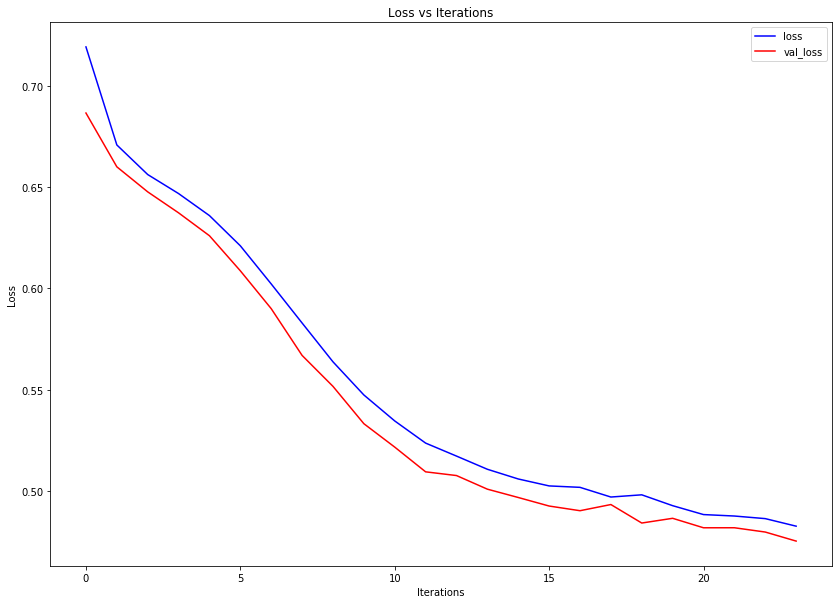

In [8]:
plt.figure(figsize=(14,10))

plt.plot(range(EPOCHS), history.history['loss'], color = 'b', label = 'loss')
plt.plot(range(EPOCHS), history.history['val_loss'], color = 'r', label = 'val_loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.legend()

In [9]:
np.argmin(history.history['val_loss'])

23

In [10]:
print(f"Model Accuracy: {model.evaluate(X_test, y_test, verbose=0)[1]}")

Model Accuracy: 0.7686635851860046


In [11]:
y_pred = model.predict(X_test)
y_pred = list(map(lambda x: np.argmax(x), y_pred))
print(f"Score: {f1_score(y_test, y_pred)}")

Score: 0.6319648093841642
